In [24]:
from __future__ import division
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import math
from scipy import stats
from sklearn.ensemble import RandomForestRegressor


from sklearn.model_selection import train_test_split


In [7]:
db = pd.read_csv('/Users/danielruizmayo/datos.csv', delimiter=";")

In [184]:
db.describe()

,target,Var 1,Var 2,Var 3,Var 4,Var 5,Var 6,Var 7,Var 8,Var 9,...,Var 167,Var 168,Var 169,Var 170,Var 171,Var 172,Var 173,Var 174,Var 175,Var 176
count,3164.000000,3164.000000,3.164000e+03,3.164000e+03,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,...,3.164000e+03,3.164000e+03,3.164000e+03,3.164000e+03,3.164000e+03,3.164000e+03,3.164000e+03,3.164000e+03,3.164000e+03,3164.000000
mean,16981.095468,95.748129,6.183221e+03,6.475051e+03,213.361252,461.822061,862.510114,217.860936,1056.828382,1732.236726,...,9.943968e+08,3.274298e+08,7.224730e+08,1.580202e+09,1.386192e+09,1.188732e+09,1.524076e+09,1.471604e+09,2.009007e+07,109.361252
std,4194.877751,132.509430,3.355245e+04,3.094296e+04,1217.892371,2732.443545,5178.807271,774.790951,4435.920162,7633.679539,...,6.677054e+09,4.454973e+09,4.165361e+09,3.459750e+10,2.527973e+10,2.978329e+10,3.196086e+10,3.088054e+10,1.086760e+08,740.880055
min,9416.000000,0.388792,2.270000e+02,3.220000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,68.000000,...,1.100528e+05,1.961969e+04,1.177771e+01,2.710687e+05,4.680764e+04,2.320873e+05,4.507895e+04,9.222444e+04,1.045050e+06,0.000000
25%,13831.500000,24.977051,7.267500e+02,8.952500e+02,16.000000,35.000000,126.750000,24.000000,177.000000,283.000000,...,4.250303e+05,1.043570e+05,3.183023e+05,6.911224e+05,4.758881e+05,7.428536e+05,3.791294e+05,5.807075e+05,2.855966e+06,10.000000
50%,16263.000000,53.449692,1.476500e+03,1.752500e+03,41.000000,82.000000,228.000000,67.000000,357.000000,520.000000,...,8.784893e+05,2.457988e+05,9.152720e+05,1.486935e+06,1.033023e+06,1.594422e+06,8.192310e+05,1.199850e+06,5.440256e+06,22.000000
75%,19273.257172,113.808196,3.883250e+03,4.517250e+03,125.000000,261.250000,541.000000,172.000000,817.250000,1244.750000,...,5.944798e+06,1.341061e+06,9.026388e+06,6.290871e+06,6.501449e+06,6.355764e+06,5.993892e+06,6.682925e+06,1.398081e+07,58.000000
max,42612.690138,1751.429296,1.465493e+06,1.310162e+06,50528.000000,114726.000000,224640.000000,28914.000000,184898.000000,315568.000000,...,2.742074e+11,2.299502e+11,8.962331e+10,1.894164e+12,1.387857e+12,1.604673e+12,1.770840e+12,1.711778e+12,4.945110e+09,28323.000000


In [185]:
print (db.keys())

Index(['target', 'Var 1', 'Var 2', 'Var 3', 'Var 4', 'Var 5', 'Var 6', 'Var 7',
       'Var 8', 'Var 9',
       ...
       'Var 167', 'Var 168', 'Var 169', 'Var 170', 'Var 171', 'Var 172',
       'Var 173', 'Var 174', 'Var 175', 'Var 176'],
      dtype='object', length=177)


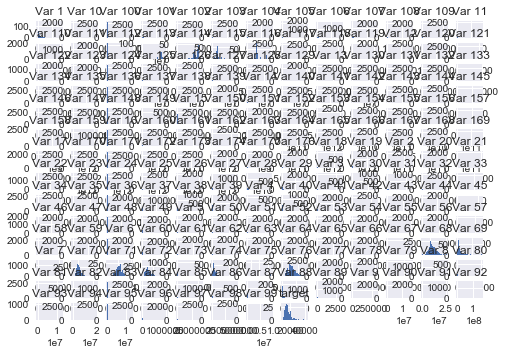

In [30]:
plt.figure()
db.hist( bins=500)
plt.show()

In [141]:
corr = db.corr()
corr

,target,Var 1,Var 2,Var 3,Var 4,Var 5,Var 6,Var 7,Var 8,Var 9,...,Var 167,Var 168,Var 169,Var 170,Var 171,Var 172,Var 173,Var 174,Var 175,Var 176
target,1.000000,-0.207993,0.146445,0.152083,0.144854,0.148156,0.126837,0.091327,0.105294,0.131512,...,0.117105,0.079967,0.131828,0.054445,0.066404,0.053140,0.065435,0.060038,0.149191,0.131535
Var 1,-0.207993,1.000000,0.151550,0.163450,0.128986,0.120575,0.139746,0.241587,0.196382,0.170645,...,0.043579,0.075008,0.026809,0.085747,0.078740,0.076750,0.073944,0.068606,0.138999,0.131569
Var 2,0.146445,0.151550,1.000000,0.997209,0.991966,0.991453,0.992565,0.934563,0.984309,0.993273,...,0.290646,0.809477,0.196363,0.810477,0.801777,0.809192,0.800377,0.797479,0.994903,0.965948
Var 3,0.152083,0.163450,0.997209,1.000000,0.988137,0.987418,0.991030,0.936642,0.985731,0.996195,...,0.309209,0.795456,0.210303,0.790815,0.780490,0.789042,0.778035,0.775663,0.991900,0.964290
Var 4,0.144854,0.128986,0.991966,0.988137,1.000000,0.997115,0.989349,0.923598,0.976389,0.987663,...,0.323573,0.786465,0.210633,0.778729,0.769916,0.783520,0.766053,0.762820,0.985689,0.972078
Var 5,0.148156,0.120575,0.991453,0.987418,0.997115,1.000000,0.990524,0.915798,0.972940,0.985172,...,0.316514,0.792428,0.200031,0.786865,0.775818,0.791536,0.772225,0.769136,0.987241,0.973138
Var 6,0.126837,0.139746,0.992565,0.991030,0.989349,0.990524,1.000000,0.911039,0.975609,0.988053,...,0.280030,0.802797,0.169479,0.807126,0.790873,0.807309,0.788160,0.786972,0.992622,0.976978
Var 7,0.091327,0.241587,0.934563,0.936642,0.923598,0.915798,0.911039,1.000000,0.967830,0.945711,...,0.311644,0.712166,0.244977,0.704074,0.698108,0.700240,0.693345,0.694468,0.913490,0.868553
Var 8,0.105294,0.196382,0.984309,0.985731,0.976389,0.972940,0.975609,0.967830,1.000000,0.988390,...,0.297533,0.780235,0.226104,0.777907,0.769971,0.773949,0.765844,0.765843,0.975014,0.941475
Var 9,0.131512,0.170645,0.993273,0.996195,0.987663,0.985172,0.988053,0.945711,0.988390,1.000000,...,0.315986,0.779202,0.221576,0.776102,0.765510,0.774841,0.761892,0.760208,0.984620,0.958902


como vemos en la matriz de correlaciones hay muchas variables con una altisima correlacion
por ejemplo var2 y var5, var34 y var35 o var14 y var4 vamos a estudiar estos 3 pares por ejemplo

In [187]:
corr_value = db.corr().values
corr_value[34,35]

0.97182299345751788

In [196]:
corr_value = db.corr().values
len(corr_value[0])
list=[3,4,5]
df = db.drop(db.columns[list], 1)
print(df)

            target       Var 1  Var 2  Var 6  Var 7  Var 8  Var 9  Var 10  \
0     15812.000000  124.038985    965    164     10    164    231    1304   
1     18797.277209   39.820501   1158    131     36    243    477    1721   
2     20346.027615  440.413436  15391   2019    290   1611   3682   17533   
3     15082.000000  140.376485    441     81     36    102    168     596   
4     15340.000000   80.968616    395     99     52    150    145     530   
5     18545.479544   20.469587   3647    245      0    241    901    3802   
6     14868.870923   42.998239   2054    306     88    489    859    1967   
7     17345.000000   75.871829    523     39     58    151    161     486   
8     24844.944493   59.257237  39042   3312    819   4788   6951   38967   
9     17042.159281  116.408298   3631    360    143    636   1259    3963   
10    16913.860448   37.438091   3421    569     75    285   1047    4489   
11    14955.000000   29.986253    514    130      5     90    200     741   

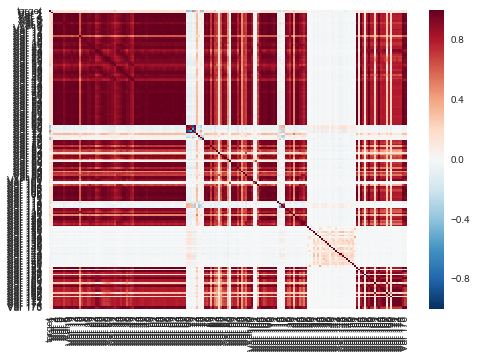

In [143]:
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.show()

Graficamente se intuye que muchas variables seran ruido  

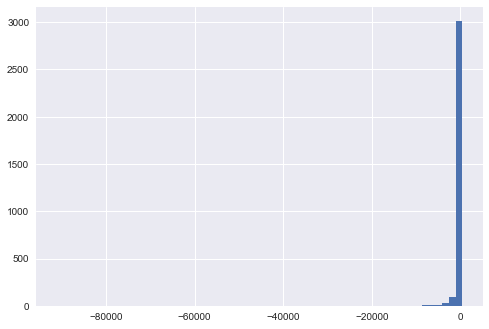

In [155]:
#db.iloc[:, [1,3]]
#db.iloc[:, [34]]-db.iloc[:, [35]]
#db.iloc[:, [34,35]].sub(axis=0)
test1 = db.iloc[:, [34]].values
test2 = db.iloc[:, [35]].values
test3 = test1 - test2
len(test3)
plt.hist(test3,bins=60)
plt.show()

In [170]:
low = .08
high = .95
#quant_df = (db.iloc[:, [34]]).quantile([low, high])
#print(quant_df)
aux=pd.DataFrame(data=test3) 
quantil = (aux).quantile([low, high])
print(quantil)


          0
0.08 -689.8
0.95    0.0


In [176]:
filtro = aux.apply(lambda x: x[(x>quantil.loc[low,x.name]) & 
                                    (x < quantil.loc[high,x.name])], axis=0)
print(filtro.head())
print(len(filtro))

     0
0  -65
1  -15
2 -471
3  -30
4   -5
2717


He limpiado los outliers a ver si ahora se ve algo mas parecido a una normal( que es lo que espero si se confirma que es la misma varaible metiendo ruido)

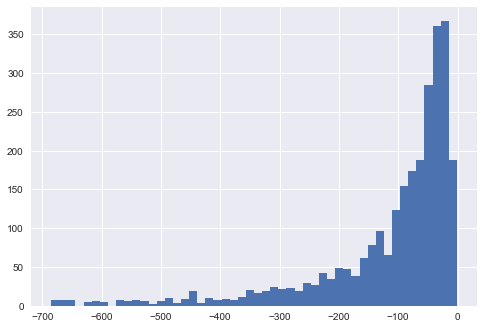

In [179]:
plt.hist(filtro,bins=50)
plt.show()

In [182]:
test1 = db.iloc[:, [4]].values
test2 = db.iloc[:, [14]].values
test3 = test1 - test2

"min : "+str(min(test3)) + " max : "+str(max(test3))+ " average : "+str(float(sum(test3)) / max(len(test3), 1))


'min : [-1269837] max : [-302] average : -5281.657079646017'

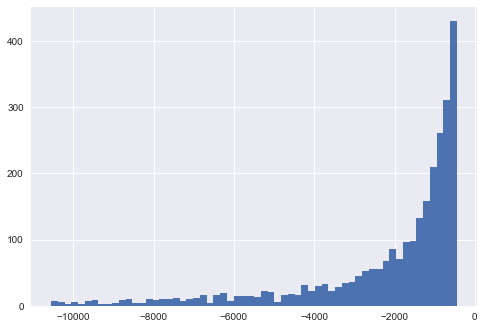

In [183]:
aux=pd.DataFrame(data=test3) 
quantil2 = (aux).quantile([low, high])
filtro2 = aux.apply(lambda x: x[(x>quantil2.loc[low,x.name]) & 
                                    (x < quantil2.loc[high,x.name])], axis=0)
plt.hist(filtro2,bins=60)
plt.show()

In [22]:
clase=db['target']
data=db.loc[:, db.columns != 'target']
X_train, X_test, y_train, y_test = train_test_split(data, clase, test_size=0.2)

In [145]:
db.isnull().sum()

target     0
Var 1      0
Var 2      0
Var 3      0
Var 4      0
Var 5      0
Var 6      0
Var 7      0
Var 8      0
Var 9      0
Var 10     0
Var 11     0
Var 12     0
Var 13     0
Var 14     0
Var 15     0
Var 16     0
Var 17     0
Var 18     0
Var 19     0
Var 20     0
Var 21     0
Var 22     0
Var 23     0
Var 24     0
Var 25     0
Var 26     0
Var 27     0
Var 28     0
Var 29     0
          ..
Var 147    0
Var 148    0
Var 149    0
Var 150    0
Var 151    0
Var 152    0
Var 153    0
Var 154    0
Var 155    0
Var 156    0
Var 157    0
Var 158    0
Var 159    0
Var 160    0
Var 161    0
Var 162    0
Var 163    0
Var 164    0
Var 165    0
Var 166    0
Var 167    0
Var 168    0
Var 169    0
Var 170    0
Var 171    0
Var 172    0
Var 173    0
Var 174    0
Var 175    0
Var 176    0
Length: 177, dtype: int64

In [ ]:
No tenemos que limpiar datos nulos porque no hay